In [264]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import confusion_matrix

In [265]:
df0 = pd.read_csv("hand_data/0.csv", header=None)
print("Class 0 Shape", df0.shape)
df1 = pd.read_csv("hand_data/1.csv", header=None)
print("Class 0 Shape", df1.shape)
df2 = pd.read_csv("hand_data/2.csv", header=None)
print("Class 0 Shape", df2.shape)
df3 = pd.read_csv("hand_data/3.csv", header=None)
print("Class 0 Shape", df3.shape)

Class 0 Shape (2910, 65)
Class 0 Shape (2903, 65)
Class 0 Shape (2943, 65)
Class 0 Shape (2922, 65)


In [266]:
df = pd.concat([df0,df1,df2,df3])
data = df.values

print("Class df Shape", df.shape)
print(df.head())

Class df Shape (11678, 65)
     0    1    2    3     4     5      6     7     8    9   ...    55    56  \
0  26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ... -28.0  61.0   
1 -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ... -25.0  47.0   
2 -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ... -83.0   7.0   
3   2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ... -38.0 -11.0   
4   6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ...  38.0 -35.0   

    57   58    59    60    61     62    63  64  
0  4.0  8.0   5.0   4.0  -7.0  -59.0  16.0   0  
1  6.0  6.0   5.0  13.0  21.0  111.0  15.0   0  
2  7.0  1.0  -8.0   7.0  21.0  114.0  48.0   0  
3  4.0  7.0  11.0  33.0  39.0  119.0  43.0   0  
4 -8.0  2.0   6.0 -13.0 -24.0 -112.0 -69.0   0  

[5 rows x 65 columns]


In [267]:
x = df.loc[:,0:63]
y = df[64] 

In [268]:
x = np.array(x)
y = np.array(y)

In [269]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [270]:
x_train = x_train.reshape(x_train.shape[0]*x_train.shape[1], 1) 
x_test = x_test.reshape(x_test.shape[0]*x_test.shape[1], 1)
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 

In [271]:
x_train = x_train.reshape((-1, 8, 8))
x_test = x_test.reshape((-1, 8, 8))

print("Training set size")
print(x_train.shape)
print("Test set size")
print(x_test.shape)

Training set size
(9342, 8, 8)
Test set size
(2336, 8, 8)


In [272]:
y_train_categorical = np.eye(np.max(y_train) + 1)[y_train]
y_test_categorical = np.eye(np.max(y_test) + 1)[y_test]


In [273]:
print("Train Data size X and y")
print(x_train.shape)
print(y_train_categorical.shape)

print("Test Data size X and y")
print(x_test.shape)
print(y_test_categorical.shape)

Train Data size X and y
(9342, 8, 8)
(9342, 4)
Test Data size X and y
(2336, 8, 8)
(2336, 4)


In [274]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(516, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((1,1), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
292/292 [==============================] - 15s 44ms/step - loss: 0.6376 - accuracy: 0.7364 - val_loss: 0.3087 - val_accuracy: 0.8857
Epoch 2/50
292/292 [==============================] - 12s 43ms/step - loss: 0.2812 - accuracy: 0.9046 - val_loss: 0.2197 - val_accuracy: 0.9238
Epoch 3/50
292/292 [==============================] - 13s 43ms/step - loss: 0.2083 - accuracy: 0.9318 - val_loss: 0.1507 - val_accuracy: 0.9538
Epoch 4/50
292/292 [==============================] - 13s 43ms/step - loss: 0.1778 - accuracy: 0.9418 - val_loss: 0.1272 - val_accuracy: 0.9615
Epoch 5/50
292/292 [==============================] - 13s 45ms/step - loss: 0.1606 - accuracy: 0.9482 - val_loss: 0.1391 - val_accuracy: 0.9555
Epoch 6/50
292/292 [==============================] - 13s 44ms/step - loss: 0.1436 - accuracy: 0.9501 - val_loss: 0.1217 - val_accuracy: 0.9636
Epoch 7/50
292/292 [==============================] - 13s 43ms/step - loss: 0.1464 - accuracy: 0.9503 - val_loss: 0.1292 - val_accuracy:

In [275]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 8, 8, 32)          320       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 4, 4, 32)         0         
 ng2D)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 4, 4, 32)          0         
                                                                 
 conv2d_101 (Conv2D)         (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 2, 2, 64)         0         
 ng2D)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 2, 2, 64)        

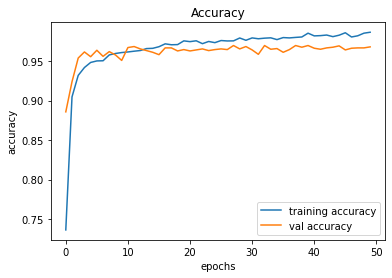

In [276]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

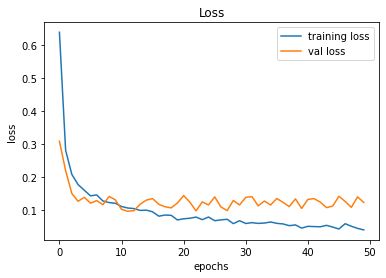

In [277]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [278]:
score = model.evaluate(x_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

73/73 [==============================] - 0s 5ms/step - loss: 0.1235 - accuracy: 0.9679
Test Loss : 0.123475581407547
Test Accuracy  : 0.9678938388824463


In [279]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

73/73 [==============================] - 1s 6ms/step


array([3, 0, 0, 2, 1, 1, 0, 3, 2, 2], dtype=int64)

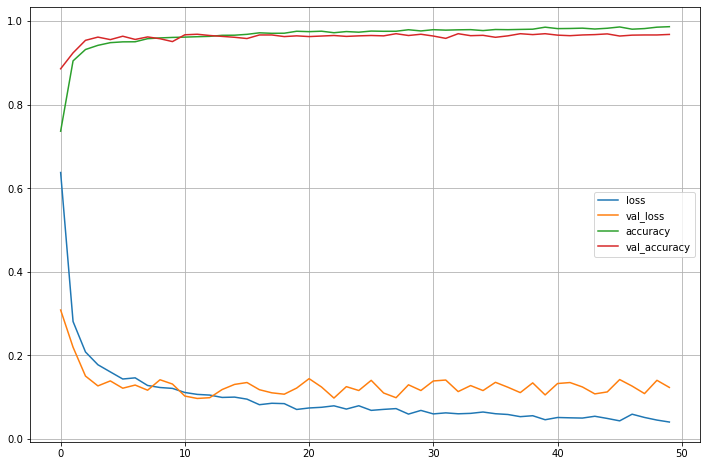

In [280]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12,8))

for each in plot_target:
    plt.plot(history.history[each], label = each)
    
plt.legend()
plt.grid()
plt.show()